In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
observation=1000
xs=np.random.uniform(low=-10, high=10,size= (observation,1))
zs=np.random.uniform(-10,10,(observation,1))

generated_inputs= np.column_stack((xs,zs))
noise=np.random.uniform(-1,1,(observation,1))
generated_target= 3 * xs -7 * zs + 5 + noise
np.savez('TF_intro',inputs=generated_inputs,target=generated_target)


In [3]:
input_size = 2
output_size = 1

In [4]:
inputs= tf.placeholder(tf.float32,[None,input_size])
targets=tf.placeholder(tf.float32,[None,output_size])

In [5]:
weights=tf.Variable(tf.random_uniform([input_size,output_size],minval= -0.1, maxval=0.1))
biases=tf.Variable(tf.random_uniform([output_size],minval= -0.1, maxval=0.1))
print(weights,biases)


Instructions for updating:
Colocations handled automatically by placer.
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32_ref> <tf.Variable 'Variable_1:0' shape=(1,) dtype=float32_ref>


In [6]:
outputs = tf.matmul(inputs,weights) + biases
print(outputs)

Tensor("add:0", shape=(?, 1), dtype=float32)


In [7]:
mean_loss =tf.losses.mean_squared_error(labels= targets, predictions=outputs) / 2
 
optimize= tf.train.GradientDescentOptimizer(learning_rate= 0.01). minimize(mean_loss)    

Instructions for updating:
Use tf.cast instead.


In [8]:
sess = tf.InteractiveSession()

In [9]:
initializer = tf.global_variables_initializer()
sess.run(initializer)


In [10]:
training_data= np.load ('TF_intro.npz')  

[ 2.87482925e-02  1.96614824e-02  1.70636356e-01 -1.34952009e-01
 -1.64749980e-01  8.60483646e-02 -8.57578889e-02 -1.06034078e-01
 -1.48193389e-01  1.38142064e-01  1.40491515e-01 -5.95019758e-02
  2.17041284e-01  5.31399772e-02 -2.18207240e-01  2.23370463e-01
  2.79221833e-01 -1.66876644e-01 -9.57908109e-02 -1.29271865e-01
  1.67736467e-02 -3.89660448e-02 -1.74857490e-02 -1.20423965e-01
 -5.92770278e-02 -1.64306968e-01  7.46981278e-02 -1.77971646e-03
  1.69602454e-01  1.37985438e-01 -1.05404012e-01  1.92364842e-01
  1.95322871e-01  8.95961225e-02 -1.62173241e-01 -9.13147628e-03
  2.11313486e-01 -1.14747919e-01 -1.07252739e-01  4.57236990e-02
 -5.39168864e-02  4.29013409e-02  8.44172761e-02  1.40835553e-01
  6.42636344e-02 -1.21429041e-02  1.50806159e-01  2.45036781e-01
  3.07004731e-02  2.58523196e-01  2.60849521e-02 -3.03560719e-02
  3.13735567e-02  2.37823665e-01  9.03655291e-02  2.82602310e-01
 -8.83101970e-02 -7.25364164e-02 -1.30401790e-01  8.45279992e-02
  4.56918776e-02  7.51503

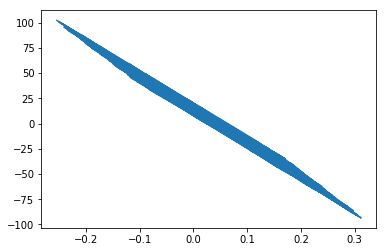

In [11]:
out = sess.run([outputs],
                      feed_dict = {inputs:training_data['inputs']})
print(np.squeeze(out))


plt.plot(np.squeeze(out),np.squeeze(training_data['target']))


In [26]:
for e in range(100):
    
      _, curr_loss =sess.run([optimize,mean_loss],
                            feed_dict = {inputs : training_data['inputs'], targets: training_data['target']})
     
      print(curr_loss)

1.8734938
1.8396208
1.8064177
1.7738732
1.7419792
1.7107166
1.6800733
1.6500409
1.6206065
1.5917549
1.5634758
1.5357598
1.5085925
1.4819664
1.4558696
1.4302906
1.4052192
1.3806465
1.356561
1.3329555
1.3098183
1.287139
1.2649119
1.2431282
1.2217736
1.2008458
1.1803328
1.1602278
1.1405213
1.1212052
1.1022757
1.08372
1.0655335
1.0477083
1.0302379
1.0131141
0.99632996
0.97987974
0.9637568
0.94795215
0.9324642
0.9172825
0.9024018
0.8878169
0.873522
0.85951257
0.84577906
0.8323197
0.8191275
0.8061973
0.79352367
0.781102
0.76892835
0.7569953
0.7452993
0.73383534
0.7226001
0.71158653
0.70079345
0.6902135
0.6798442
0.6696818
0.65971965
0.6499564
0.6403868
0.6310069
0.6218134
0.6128036
0.6039715
0.59531575
0.5868313
0.57851565
0.57036585
0.5623771
0.5545477
0.5468734
0.5393508
0.531979
0.5247529
0.51767033
0.51072884
0.5039252
0.49725658
0.49072033
0.48431396
0.47803503
0.4718806
0.46584806
0.45993677
0.45414147
0.44846168
0.44289476
0.4374385
0.43209106
0.42684883
0.42171136
0.41667572
0.411740

In [27]:
curr_loss

0.40216112

1

In [25]:
bin
(int(curr_loss))

1